
# Práctica 1: Metaheurísticas basadas en trayectorias: Temple Simulado

<center><h3>
    Nombre Apellidos
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guion hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guion. Responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los ejercicios"**. Por favor, no modifiques ninguna línea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_TempleSimulado.zip` que contenga los siguientes ficheros:

 * `APELIDOS_NOME_TempleSimulado.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_TempleSimulado.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problemas utilizados en la resolución.


## Preliminares adicionales sobre Python para esta práctica


Conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte especialmente útiles más adelante en la realización de esta práctica.


Por ejemplo, puedes generar números aleatorios de la siguiente forma utilizando el paquete `random`.

In [1]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)
print (numero_U)


4
0.27026871439272904


Puedes generar vectores de números fijos y aleatorios que a su vez estén barajados de manera aleatoria como se ilustra a continuación.

In [2]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)


vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 7, 4, 6, 3, 5, 2, 1, 8]
vector aleatorio  [7, 6, 1, 6, 10, 7, 4, 4, 5]
[7, 4, 5, 4, 6, 7, 6, 1, 10]


Puedes incluso fijar la semilla para generar números aleatorios si quisieras que la aleatorización fuera determinista (i.e., secuencias de números aletorios que pueden ser reproducibles). Fíjate en el siguiente ejemplo que muestra como esta determina la secuencia de número si se establece una semilla y por tanto su repitibilidad. Esto puede ser útil si queremos asegurar que dos ejecuciones den el mismo resultado.

In [3]:
import time

# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)



vector aleatorio  [8, 10, 2, 6, 3, 1, 6, 5, 9]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Un último ejemplo del uso de la semilla sería establecerla justo antes de invocar a una función que queremos hacer la aleatorización totalmente determinista por cuestiones reproducibilidad. Puedes averiguar más en: https://docs.python.org/3/library/random.html

In [4]:

def mi_funcion_pseudo_aleatoria (semilla=None):
    # también podemos recibir la semilla y establecerla en la primera línea
    if (semilla is not None):
        random.seed(semilla)
        
    mi_vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
    return mi_vector_aleatorio
    

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(54321)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)


vector_aleatorio = mi_funcion_pseudo_aleatoria(12345)
print ("vector aleatorio ", vector_aleatorio)



vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [8, 2, 4, 3, 9, 9, 7, 3, 6]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]


Otro conjunto de funciones importantes son las que vienen del módulo `math`. Puedes encontrar una lista de las funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos a continuación algunos ejemplos de uso.

In [5]:
import math 

# número e elevado a la potencia indicada
e=math.exp(1)
print (e)

power2_e=math.exp(2)
print (power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))


2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, las funciones del módulo `time` te permiten obtener de manera aproximada tiempos de ejecución de secciones concretas de código. 

In [6]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.08433794975280762 segundos ----


## El Problema del Viajante de Comercio (VC) con Temple Simulado

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Enfriamiento o Temple Simulado (SA, del inglés Simulated Annealing). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.


Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la fórmula del semiverseno https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno, que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra.


En primer lugar deberás importar el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [7]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [8]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

In [9]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))

55.88273580792048
119.30959564041359


El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

El problema pertenece a la categoría de problemas NP, ya que el espacio de búsqueda posible está formado por todas las permutaciones de las n ciudades. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas (MH), pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas. En esta primera práctica, te vas a centrar en implementar y estudiar la MH Enfriamiento o Temple Simulado.


## P1.1: Implementación básica de Temple Simulado



Implementa el algoritmo básico de Temple Simulado para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva (Véase T1, diapositiva 40 y asociadas).

Ten en cuenta las siguientes consideraciones de diseño para completar la implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones)  comenzando y finalizando en la ciudad 0. 

- Solución inicial: generación aleatoria de una permutación válida.

- Operador  de  selección  de  la  solución  siguiente  Scand  a  partir  de  la  actual  Sact:  operador  de  intercambio. 

- Velocidad de enfriamiento: se ha generado un único vecino. 

- Función de coste: suma de las distancias del camino según el orden del recorrido.

- Mecanismo de enfriamiento: mecanismo exponencial decreciente que sigue la expressión 𝑇(𝑘)=T0·𝑒(−𝜆𝑘), donde 𝑘 es el número de iteración y T0, λ son los parámetros de diseño.

    Para esta implementación básica considera, 𝑇(𝑘) = 20 · 𝑒(−0.0045𝑘), para establecer los parámetros por defecto de T0 y 𝜆, con temperatura inicial fija T0=20 y 𝜆=0.0045 respectivamente.

- Condición de parada: número fijo de iteraciones (limite=1000). No se precisa definir Tfinal.

Para verificar tu implementación, puedes utilizar el fichero de localizaciones de 8 ciudades gallegas (*grafo8cidades.txt*). La solución óptima resuelta con una búsqueda informada como A* se sitúa en torno a los 382km.

Para comprobar que tu implementación es suficientemente general como para manejar problemas del VC diferentes tallas, puedes probar también con el fichero de localizaciones de 120 ciudades de USA proporcionado en esta práctica (*US120.txt*).

**IMPORTANTE**: Es imprescindible que en tu implementación tengas funciones totalmente parametrizadas para el mecanismo de enfriamiento y la función de coste; también deberías parametrizar el algoritmo para poder recibir una solución inicial y una semilla para inicializar el generador de números aleatorios al principio de la ejecución del algoritmo de Temple Simulado. Estas recomendaciones sobre modularidad te facilitará la resolución de las cuestiones del test automático de evaluación.


In [10]:
def N_solution(Sact):
    Scand = Sact.copy()
    swap_a = random.randint(1, len(Scand)-2) #posicion 1 cambiar
    swap_b = random.randint(1, len(Scand)-2) #posicion 2 a cambiar
    while(swap_a == swap_b): # posicion 1 != posicion 2
        swap_b = random.randint(1, len(Scand)-2)
    
    #intercambio
    bubble = Scand[swap_a]
    Scand[swap_a] = Scand[swap_b]
    Scand[swap_b] = bubble
    
    return Scand

In [11]:
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = [0]; # Inicio en 0 siempre
    
    while(len(initial_solution) != Loc.nciudades): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    
    initial_solution.append(0) # Terminal en la misma ciudad que empezaste
    return initial_solution 

In [12]:
def cost(Sact, Loc):
    cost=0
    for i in range(0,len(Sact)-1):
        cost+= Loc.distancia(Sact[i], Sact[i+1])
    return cost;

In [13]:
def mecanismo_enfriamiento(k):
    return 20*math.exp(-0.0045*k)

In [14]:
def simulated_annealing(alpha, Loc, L=1):
    T = 20
    Sact = gen_initial_solution(Loc)
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(k)
        k+=1
    return Sact

In [15]:
a = Localizaciones(filename='./data/grafo8cidades.txt')
b = simulated_annealing(mecanismo_enfriamiento,a)
cost(b,a)

381.6699617675482

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

In [16]:
def pruebas(alpha, Loc):
    n_pruebas = 300
    solucion = []
    coste = float('inf')
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (coste < costeCand):
            continue
        coste = costeCand
        solucion = solucionCand

    return (coste,solucion)

In [17]:
soluciones = pruebas(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
print(soluciones)

(75085.04834981167, [0, 69, 13, 109, 83, 2, 58, 11, 66, 27, 93, 26, 75, 62, 70, 106, 4, 35, 64, 84, 53, 16, 119, 82, 37, 89, 105, 28, 47, 49, 73, 52, 48, 104, 103, 65, 86, 92, 41, 50, 18, 59, 24, 63, 14, 113, 80, 78, 74, 36, 71, 42, 68, 91, 110, 10, 32, 90, 22, 107, 114, 81, 99, 19, 17, 23, 57, 44, 45, 30, 6, 102, 85, 116, 118, 76, 39, 98, 38, 40, 21, 55, 111, 67, 1, 88, 25, 20, 61, 115, 29, 54, 46, 97, 87, 7, 9, 117, 56, 12, 15, 72, 95, 96, 34, 60, 31, 33, 108, 112, 5, 8, 3, 94, 43, 100, 79, 101, 51, 77, 0])


In [18]:
def pruebas_distribucion(alpha, Loc):
    n_pruebas = 300
    soluciones = {}
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (costeCand not in soluciones):
            soluciones[costeCand]=1
            continue
        soluciones[costeCand]+=1
    return soluciones

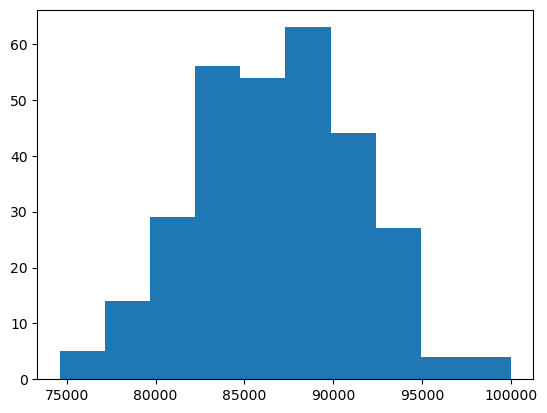

In [19]:
import matplotlib.pyplot as plt
def graficar(soluciones):
    fig, ax = plt.subplots()
    ax.hist(soluciones)

soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

❓ **Pregunta 2. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.**

**Notas: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite.**

### Ajuste dinámico de temperatura inicial


En tu implementación has establecido la temperatura inicial siguiendo un valor fijo completamente arbitrario. Esto puede no resultar siempre adecuado, y suele ser más conveniente disponer de un ajuste de la temperatura inicial (T0) que tenga en cuenta la instancia del problema a resolver. 

Modifica la implementación anterior para que puedas parametrizar el valor inicial del parámetro de control T0 utilizando la siguiente fórmula:

    𝑇0 = (−𝜇/ln(𝜙))·𝐶(𝑆0), que permite aceptar (con una probabilidad 𝜙) soluciones siguientes que empeoren en μ (tanto por uno) a S0 (esto es, que sean (1+ μ) veces peores).

En la fórmula, C(S0) es el coste de la solución inicial, con valores por defecto 𝜙=0.50 y 𝜇=0.01.


In [20]:
import numpy as np

def T_calculate(tetha, mu, S0, Loc):
    return (-mu/np.log(tetha)*cost(S0,Loc))


In [21]:
def N_solution(Sact):
    Scand = Sact.copy()
    swap_a = random.randint(1, len(Scand)-2) #posicion 1 cambiar
    swap_b = random.randint(1, len(Scand)-2) #posicion 2 a cambiar
    while(swap_a == swap_b): # posicion 1 != posicion 2
        swap_b = random.randint(1, len(Scand)-2)
    
    #intercambio
    bubble = Scand[swap_a]
    Scand[swap_a] = Scand[swap_b]
    Scand[swap_b] = bubble
    
    return Scand

In [22]:
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = [0]; # Inicio en 0 siempre
    
    while(len(initial_solution) != Loc.nciudades): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    
    initial_solution.append(0) # Terminal en la misma ciudad que empezaste
    return initial_solution 

In [23]:
def cost(Sact, Loc):
    cost=0
    for i in range(0,len(Sact)-1):
        cost+= Loc.distancia(Sact[i], Sact[i+1])
    return cost;

In [24]:
def mecanismo_enfriamiento(k):
    return 20*math.exp(-0.0045*k)

In [25]:
def simulated_annealing(alpha, Loc, L=1):
    Sact = gen_initial_solution(Loc)
    T = T_calculate(0.5,0.01,Sact,Loc)
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(k)
        k+=1
    return Sact

In [26]:
a = Localizaciones(filename='./data/US120.txt')
b = simulated_annealing(mecanismo_enfriamiento,a)
cost(b,a)

87686.41764063742

In [27]:
a = Localizaciones(filename='./data/US120.txt')
b = pruebas(mecanismo_enfriamiento,a)
print(b)

(74912.52918362424, [0, 39, 30, 97, 6, 76, 45, 47, 11, 52, 17, 15, 54, 5, 112, 73, 34, 98, 55, 63, 62, 58, 2, 8, 119, 7, 96, 92, 60, 118, 61, 12, 115, 67, 1, 36, 66, 65, 27, 33, 95, 44, 102, 106, 116, 29, 46, 88, 9, 26, 64, 24, 41, 74, 78, 81, 89, 82, 49, 70, 111, 16, 38, 71, 42, 4, 113, 14, 84, 18, 104, 108, 48, 57, 85, 72, 87, 20, 31, 103, 25, 117, 23, 93, 86, 43, 105, 35, 28, 3, 40, 91, 110, 37, 50, 53, 94, 83, 69, 80, 101, 109, 51, 10, 56, 19, 99, 59, 21, 75, 13, 77, 68, 32, 79, 22, 114, 100, 90, 107, 0])


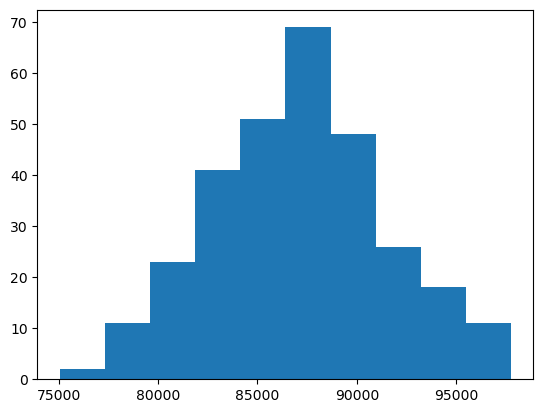

In [28]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [29]:
Loc = Localizaciones(filename='./data/grafo8cidades.txt')
Sact = [0,1,2,3,4,5,6,7,0]
SactCost = [0,7,2,4,5,1,6,0]
cost(Sact,Loc)
cost(SactCost,Loc)

622.2887829536207

In [30]:
print("Theta     Mu      C(S0)     T")
print("0.5       0.01    381.669  ", T_calculate(0.5,0.01,Sact,Loc))
print("0.99      0.01    381.669  ", T_calculate(0.99,0.99,Sact,Loc))
print("0.5       0.99    381.669  ", T_calculate(0.5,0.99,Sact,Loc))
print("0.5       0.01    619.172  ", T_calculate(0.5,0.01,SactCost,Loc))

Theta     Mu      C(S0)     T
0.5       0.01    381.669   5.506333610983221
0.99      0.01    381.669   37596.083121762735
0.5       0.99    381.669   545.1270274873389
0.5       0.01    619.172   8.977729411680173


❓ **Pregunta 3.1**. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, amplia de manera razonada la tabla con variaciones de 𝜙 y 𝜇 para cada uno de los problemas. ¿Qué combinación de 𝜙 y 𝜇 da mayor/menor T0?

❓ **Pregunta 3.2**. Escoge 4 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.

 
## P1.2: Mejoras del algoritmo de Temple Simulado

En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo con lo visto en las clases expositivas. Podrá modificarse cualquiera de los siguientes parámetros u operadores:
- El valor inicial del parámetro de control (T0).
- El mecanismo de enfriamiento.
- La velocidad de enfriamiento.
- El mecanismo de selección de las soluciones candidatas
- El criterio de parada

**Importante**: Debes mantener una implementación de la versión básica que pueda ser ejecutada en la evaluación. Así que se recomienda que la implementación del algoritmo con las mejoras sea implementada en otra función reservada para la versión mejorada. 

In [38]:
import matplotlib.pyplot as plt
#Obtiene el coste de la mejor solución de una muestra de n_pruebas
def pruebas(alpha, Loc):
    n_pruebas = 300
    solucion = []
    coste = float('inf')
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (coste < costeCand):
            continue
        coste = costeCand
        solucion = solucionCand

    return (coste,solucion)

#Obtiene todos los costes de una muestra de n_pruebas
def pruebas_distribucion(alpha, Loc):
    n_pruebas = 300
    soluciones = {}
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (costeCand not in soluciones):
            soluciones[costeCand]=1
            continue
        soluciones[costeCand]+=1
    return soluciones

#Genera un histograma de frecuencias, al pasarle un diccionario {costes, n_apariciones_coste}
def graficar(soluciones):
    fig, ax = plt.subplots()
    ax.hist(soluciones)
    

### Temple simulado P1.1

In [20]:
#Temple simulado P1.1
import numpy as np

def T_calculate(tetha, mu, S0, Loc):
    return (-mu/np.log(tetha)*cost(S0,Loc))


In [21]:
def N_solution(Sact):
    Scand = Sact.copy()
    swap_a = random.randint(1, len(Scand)-2) #posicion 1 cambiar
    swap_b = random.randint(1, len(Scand)-2) #posicion 2 a cambiar
    while(swap_a == swap_b): # posicion 1 != posicion 2
        swap_b = random.randint(1, len(Scand)-2)
    
    #intercambio
    bubble = Scand[swap_a]
    Scand[swap_a] = Scand[swap_b]
    Scand[swap_b] = bubble
    
    return Scand

In [22]:
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = [0]; # Inicio en 0 siempre
    
    while(len(initial_solution) != Loc.nciudades): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    
    initial_solution.append(0) # Terminal en la misma ciudad que empezaste
    return initial_solution 

In [23]:
def cost(Sact, Loc):
    cost=0
    for i in range(0,len(Sact)-1):
        cost+= Loc.distancia(Sact[i], Sact[i+1])
    return cost;

In [24]:
def mecanismo_enfriamiento(k):
    return 20*math.exp(-0.0045*k)

In [25]:
def simulated_annealing(alpha, Loc, L=1):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T= T0
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(k)
        k+=1
    return Sact

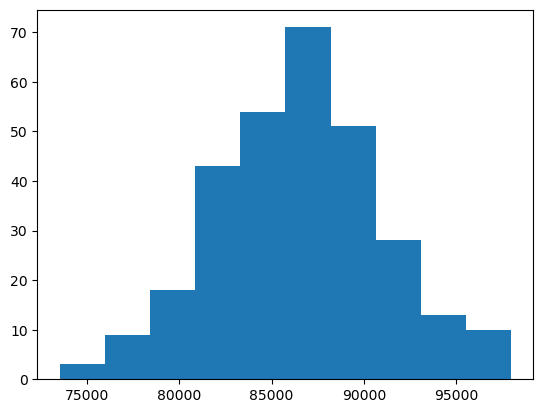

In [158]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

### Temple simulado P1.2.1

In [28]:
import numpy as np

def mecanismo_enfriamiento(T0,k):
    return (T0/(1+k))

In [14]:
def simulated_annealing(alpha, Loc, L=1):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

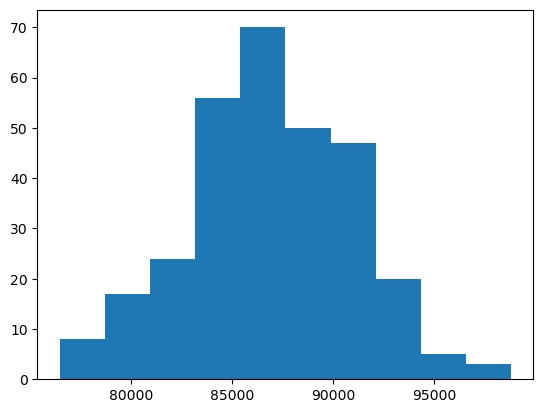

In [139]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

### Temple simulado P1.2.2

In [41]:
def simulated_annealing(alpha, Loc, L=4):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

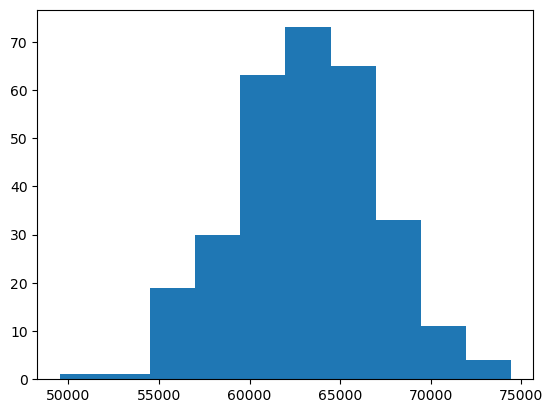

In [42]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [43]:
def simulated_annealing(alpha, Loc, L=6):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

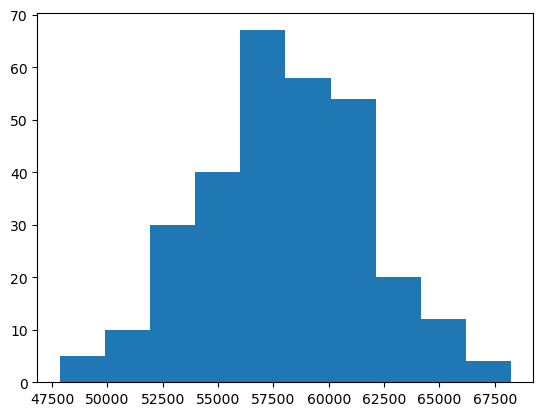

In [44]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [62]:
def simulated_annealing(alpha, Loc, L=8):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

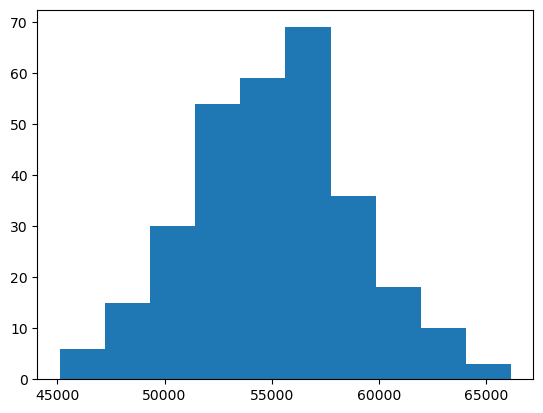

In [46]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

### Temple simulado P1.2.3

In [16]:
def simulated_annealing(alpha, Loc, L=4):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000 or math.trunc(T) > 0):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

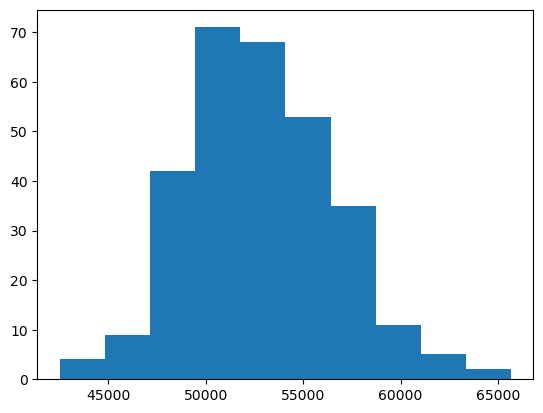

In [69]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [78]:
def simulated_annealing(alpha, Loc, L=6):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000 or math.trunc(T) > 0):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

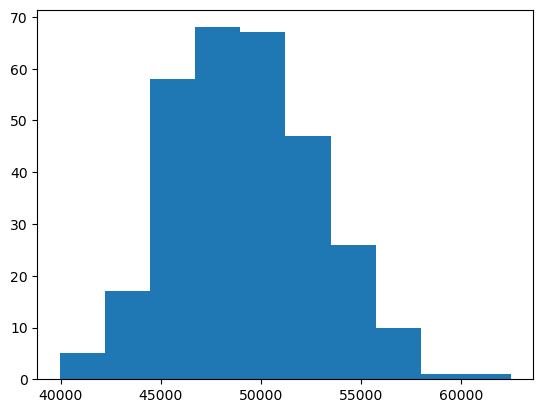

In [79]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [82]:
def simulated_annealing(alpha, Loc, L=8):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000 or math.trunc(T) > 0):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

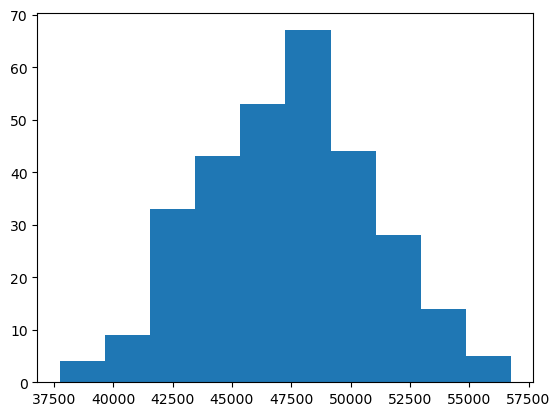

In [83]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [26]:
def simulated_annealing(alpha, Loc, L=12):
    Sact = gen_initial_solution(Loc)
    T0 = T_calculate(0.5,0.01,Sact,Loc)
    T = T0
    k = 0
    while(k < 1000 or math.trunc(T) > 0):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (subtraction < 0) or (random.uniform(0,1) < math.exp(-subtraction/T))):
                Sact=Scand
        T= alpha(T0,k)
        k+=1
    return Sact

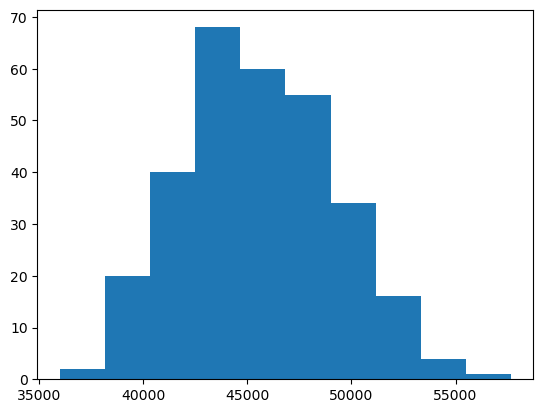

In [34]:
soluciones = pruebas_distribucion(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)

In [45]:
 inicio = time.time() 
a = simulated_annealing(mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
time.sleep(1)
delta_time = time.time() - inicio
print(delta_time)
print(cost(a,Loc=Localizaciones(filename='./data/US120.txt')))

1.7735247611999512
47073.86853357832


❓ **Pregunta 4. Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? ¿Cuáles no parecen haber funcionado tan bien como esperabas y por qué?  Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas o no para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.**

**Importante**: Aunque puedes obtener tantas celdas de ejecución de laboratorio y resultados como necesites, tu informe final en respuestas a la pregunta 4 no debería superar las 1200 palabras.



#### Respuestas a los ejercicios (10 puntos)

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
Las respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta, organizadas en celdas de tal forma que sea un documento fácil de leer y seguir.

*P1.1: Implementación básica* (5 puntos)

<ins>La implementación básica se evaluará mediante un cuestionario automático de evaluación. </ins> Este lo realizarás en la primera sesión de la próxima práctica, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma. 

Aclaración: Independientemente del cuestionario automático de evaluación, siempre considera que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.

*P1.2: Implementación mejoras* (5 puntos)

Pregunta 4 (MAX. 1200 palabras)

La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, y la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se valorará más positivamente las intervenciones de mejora que tengan mayor dificultad de implementación que las triviales. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión). 

❓ **Pregunta 1. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)**

Para resolver el problema del Viajante Comercio a través del algoritmo Temple Simulado se ha realizado la siguiente implementación.Donde se solicitan los siguientes parámetros: una temperatura inicial, una función que defina un mecanismo de enfriamiento, una velocidad de enfriamiento y un conjunto de localicaciones sobre los que se ejecutará el algoritmo.

``` python
def simulated_annealing(T0, alpha, L=1, Loc=Localizaciones(filename='./data/grafo8cidades.txt')):
    T = T0
    Sact = gen_initial_solution(Loc)
    k = 0
    while(k < 1000):
        for i in range(0,L): # Velocidad de enfriamiento, cada cuato hay q enfriar
            Scand = N_solution(Sact)
            subtraction = cost(Scand,Loc) - cost(Sact,Loc)
            if ( (random.uniform(0,1) < math.exp(-subtraction/T)) or (subtraction < 0)):
                Sact=Scand
        T= alpha(k)
        k+=1
    return Sact
```
El algoritmo al comenzar, deberá inicializar una posible solución que comience y termine en la ciudad inicial, 0. Para así ejecutar k veces el mecanismo de enfriamiento, alpha(), con una velocidad de enfriamiento, L, y se variará la solución actual en función a una condición, que se explicará más adelante.

Para inicializar la primera solución actual, se utiliza la función gen_initial_solution(Loc), que genera un vector con la ciudad 0, en la primera y última posición del vector y el resto del vector se rellena con el resto de las ciudades sin repetirse y con un orden aleatorio.

``` python
def gen_initial_solution(Loc):
    vector = [x for x in range (1,Loc.nciudades)] # Todas las posibles ciudades a añadir a initial_solution
    random_value = random.randint(0, Loc.nciudades-2) # Primera posible ciudad 
    initial_solution = [0]; # Inicio en 0 siempre
    
    while(len(initial_solution) != Loc.nciudades): # Mientras no se hayan acabado las ciudades
        
        if(vector[random_value] != 0): # Si no se ha añadido la ciudad
            initial_solution.append(vector[random_value])
            vector[random_value] = 0 # Marcar como añadida la ciudad
            
        random_value = random.randint(0, Loc.nciudades-2)
    
    initial_solution.append(0) # Terminal en la misma ciudad que empezaste
    return initial_solution 
```

Al comenzar la ejecución del algoritmo, se calcula la solución candidata con respecto a la solución actual, N_solution(Sact). Esta función utiliza el operador de intercambio y genera la solución candidata a través de intercambiar dos posiciones, que no sean la primera ni la última. 

``` python
def N_solution(Sact):
    Scand = Sact.copy()
    swap_a = random.randint(1, len(Scand)-2) #posicion 1 cambiar
    swap_b = random.randint(1, len(Scand)-2) #posicion 2 a cambiar
    while(swap_a == swap_b): # posicion 1 != posicion 2
        swap_b = random.randint(1, len(Scand)-2)
    
    #intercambio
    bubble = Scand[swap_a]
    Scand[swap_a] = Scand[swap_b]
    Scand[swap_b] = bubble
    
    return Scand
```

Posteriormente se evalua el coste de la solución candidata con respecto a la solución actual y esta se toma como nueva solución actual si el coste de la solución actual es mayor que el coste de la solución candidata o si el calculo de e^(-(costeSolucionActual-costeSolucionCandidata)/T) es mayor que un número random que sigue la distribución normal(0,1). Cada ejecución del algortimo implica, ejecutar L(velocidad de enfiramiento) veces el mecanismo de enfriamiento que es el encargado de disminuir la temperatura, T. Cuanto mayor sea la velocidad de enfriamiento, más veces se ejecutará el mecanismo de enfriamiento y antes disminuirá la temperatura que repercutirá en la probailidad de aceptar o no la condición de aceptar la solución candidata. Además se puede detener el algoritmo por las k iteracciones o si se pone un valor mínimo para la temperatura, pero en este caso solo se tendrán en cuenta las iteracciones.

Para calcular el coste de una solución se suma la distancia desde la ciudad inicial, hasta volver a la ciudad final que en un ciclo hamiltoniano es la misma que la inicial.
``` python
def cost(Sact, Loc):
    cost=0
    for i in range(0,len(Sact)-1):
        cost+= Loc.distancia(Sact[i], Sact[i+1])
    return cost;
```
Para el mecanismo de enfriamiento, que se encarga de disminuir la termperatura, se utiliza la siguiente formula 𝑇(𝑘)=T0·𝑒^(−𝜆𝑘), donde 𝜆=0.0045 y T0=20.
``` python
def mecanismo_enfriamiento(k):
    return 20*math.exp(-0.0045*k)
```

❓ **Pregunta 2. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.**

**Notas: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite.**

Para analizar el funcinamiento del algoritmo se han diseñado dos algoritmos:

``` python
def pruebas(T0, alpha, Loc):
    n_pruebas = 300
    solucion = []
    coste = float('inf')
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(T0,mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (coste < costeCand):
            continue
        coste = costeCand
        solucion = solucionCand

    return (coste,solucion)
```
Este ejecuta n_pruebas veces el algoritmo Temple Simulado y se queda con la solución con menor coste de todas las n_pruebas. Ejecutando varias veces dicho algoritmo, se aprecia que en cada ejecución se obtiene una solución diferente, por lo que no siempre devuelve la óptima. Tras esta primera conclusión se procede a generar un nuevo algoritmo devuelva todas las distintas soluciones y su coste para graficarlos en un histograma de frecuencias. El algoritmo es el siguiente:

``` python
def pruebas_distribucion(T0, alpha, Loc):
    n_pruebas = 300
    soluciones = {}
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(T0,mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (costeCand not in soluciones):
            soluciones[costeCand]=1
            continue
        soluciones[costeCand]+=1
    return soluciones
```
Devuelve un diccionario con key el coste de la solución y value el número de apariciones de ese coste. Para graficar dichas soluciones se ha generado la siguiente función:
``` python
import matplotlib.pyplot as plt
def graficar(soluciones):
    fig, ax = plt.subplots()
    ax.hist(soluciones)
```
Para posteriormente utilizar todo de esta manera:

``` python
soluciones = pruebas_distribucion(20,mecanismo_enfriamiento,Loc=Localizaciones(filename='./data/US120.txt'))
graficar(soluciones)
```


❓ **Pregunta 3.1. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, amplia de manera razonada la tabla con variaciones de 𝜙 y 𝜇 para cada uno de los problemas. ¿Qué combinación de 𝜙 y 𝜇 da mayor/menor T0?**

Teniendo en cuenta esta ecuación para el calculo de la temoeratura 𝑇0 = (−𝜇/ln(𝜙))·𝐶(𝑆0), se puede hacer un estudio previo de como va afectar la variación de thetha, mu y el coste de la solución inicial:

-> El coste de la S0 afectará directamente proporcional al valor de T0, por lo tanto cuanto mayor sea el coste, mayor será T0 y cuanto menor sea el coste de S0, menor será el valor de T0.

-> El valor de mu, al estar en el numerador, cuanto mayor sea este, mayor será el resultado de la fracción y en consecuencia el de T0. Hay que tener en cuenta el signo negativo, que al estar dividido por un theta < 1 en un logaritmo, que dará un resultado negativo, obtendrá un cociente positivo.

-> El valor de theta, esta envuelto en un logaritmo, situado en el denominador de la fracción. Por lo que si theta tiene un valor cercano a 1, el logatimo dará un número negativo cercano a 0, lo que proporcionará un mayor cociente (Recordar que el signo negativo se va con el del numerador).
``` python
Theta     Mu      C(S0)     T
0.5       0.01    381.669   5.506333610983221
0.99      0.01    381.669   37596.083121762735
0.5       0.99    381.669   545.1270274873389
0.5       0.01    619.172   8.977729411680173
```
Para obtener un mayor T0, la mejor solución es aumentar el valor de Theta cerca de 1. Por ejemplo 0.999.
Para obtener un menor T0, la mejor solución puede ser disminuir Theta o reducir el tamaño de mu cerca de 0. Por ejemplu mu=0.0005


❓ **Pregunta 3.2. Escoge 4 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.**



❓ **Pregunta 4. Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? ¿Cuáles no parecen haber funcionado tan bien como esperabas y por qué?  Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas o no para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.**

Para estudiar como influyen las mejoras en el algoritmo, se generará un gráfico, en concreto histograma de frecuencia, donde se podrá analizar la frecuencia con la que aparecen los costes de las mejores soluciones obtenidas. Con el fin de mejorar el algortimo desarrollado en la primera parte de la práctica se va a trabajar en rediseñar y reimplementar los siguientes aspectos:

- **El valor inicial del parámetro de control (T0)**: El valor inicial de T0, da mejores resultados al algoritmo cuando no esta prefijado, ya que si es muy alto puede tardar en converger y si es muy bajo no llegar a la solución óptima. Por este motivo se debe precualcular, teniendo en cuenta que sea proporcional al tamaño del problema en el que nos encontramos. **Se utilizará 𝑇0 = (−𝜇/ln(𝜙))·𝐶(𝑆0).**

- **El mecanismo de enfriamiento:** Es fundamental prederminar cuanto se va a disminuir la temperatura en cada iteración. En un primer momento se utilizó 𝑇(𝑘) = 20 · 𝑒(−0.0045𝑘),mientras que en esta nueva implementación se utilizará el **esquema de Cauchy: Tk = T0 / (1 + k)**, que hace una curva descendente, disminuyendo mucho la temperatura al inicio y cada vez menos.

- **La velocidad de enfriamiento:** Es el número de veces que se ejecuta el algoritmo antes de ejecutar mecanismo de enfriamiento en una misma iteración, lo que permite generar más soluciones candidatas para un mismo valor de la temperatura. En la primera implementación este L(T) estaba prefijado a 1. En esta nueva implementación se podría hacer que sea dinámico y se calcule en cada iteración, pero por simplificarla se tomarán **varios valores mayores que 1** y se compararán.

- **El mecanismo de selección de las soluciones candidatas:** El operador utilizado para la selección de una nueva posible solución es el de intercambio, a través de la aleatoridad, por lo que no resultará de mucha utilildad modificar dicho operador a inserción o inversión simple, ya que mantendrá esa aleatoriedad en la elección de en que posiciones actuar. Por lo que se mantendrá el **operador de intercambio.**

- **El criterio de parada:** El criterio de parada utilizado hasta ahora es un limitador de hasta **1000 iteraciones**, en esta nueva implementación se va añadir la limitación de que **T > Tf=0** y estudiar si da un mejor o peor resultado.

**Todas estas mejoras se irán añadiendo de forma incremental y en caso de no surtir efecto se descartarán, el índice de cada mejora corresponde a la sección donde esta la implementación, por ejemplo "***(P1.2.1 Temple Simulado)***" corresponde a la implementación de mejoras, y a la primera mejora**. 

***(P1.1 Temple Simulado)***:La gráfica de frecuencia que se genera tras las pruebas realizadas sobre la primera implementación:

<center><img src="./img/g1.png"/></center>

***(P1.2.1 Temple Simulado)***: La primera mejora a implementar es el nuevo mecanismo de enfriamiento, con el cual se obtiene una mejora en la frecuencia de las soluciones, se sigue apreciando una distribución normal, pero movida hacia la izquierda y por lo tanto disminuyen las soluciones con costes superiores a 92.500 km. Aunque también disminuye la frecuencia con la que aperecen las soluciones más óptimas, aquellas infeores a 75.000 km.

<center><img src="./img/g2.png"/></center> 

***(P1.2.2 Temple Simulado)***: La segunda mejora que se aplicará será aumentar la velocidad de enfriamiento de forma aditiva al nuevo mecanismo de enfriamiento, que ya ha sido implementado, y que sigue el esquema de Cauchy. Al aumentar la velocidad de enfriamiento se han conseguido mejores resultados, además dichos resultados siguen mejorando cuanto más aumentes L(T), ya que estas calculando más soluciones candidatas para el mismo valor de temperatura. Como es lógico esto aumenta la complejidad temporal del algoritmo, ya que para un mismo valor de la temperatura se ejecutan L(T) veces el algoritmo. Para ser óptimos hay que buscar un equilibrio entre obtener un mejor coste(de la mejor solución) y el coste temporal, ya que llegará un valor de L(T) donde la mejora es menos relevante, pero su coste temporal es muy alto.

<center><img src="./img/c1.png"/></center>

***(P1.2.3 Temple Simulado)***:La última mejora que se implementará será relacionada con la condición de parada. Se detendrá la ejecución al completar 1000 iteraciones, como se había declarado en la primera ejecución, o al llegar a una temperatura final, Tf, determianda. Lo habitual a nivel teórico sería Tf = 0, pero al tratarse de el esquema de Cauchy Tk = T0 / (1 + k), existe una asíntota horizontal en el eje y = 0, por lo que se tomará el valor entero del resultado. Es decir, si Tk = 0.1, se tomará como 0 y se detendrá la ejecución. Aplicando la condición de parada obtenemos aún mejores resultados y un menor coste temporal ya que no siempre se van a realizar las 1000 iteraciones. Esta mejoría en los resultados puede surgir de **evitar hacer iteraciones con temperarutas negativas que influyen en la condición de aceptar de una solución candidata**.

<center><img src="./img/c2.png"/></center>

Como conclusión, las ideas implementadas han supuesto una mejora, desde el cambio de mecanismo de enfriamiento cuya mejora ha sido leve, hasta la implementación de la nueva condición de parada y el cambio en la velocidad de enfiramiento que han mejorado el algoritmo muy notable. **Comparando los resultados de la nueva implementación con la primera implementación, la mejora total es tan significativa que en la primera implementación el coste(de la mejor solución) con mayor frecuencia era de 87.500km y tras la última mejora y con una velocidad de enfriamiento 8, L(T) = 8, se consigue que el coste(de la mejor solución) con mayor frecuencia sea 47.500km, además que el mejor coste para la primera implementación rondaba los 72.500km y en la implementación con mejoras ronda los 37.500km, aproximadamente la mitad de distancia**.

### Anexo: 

Las funciones utilizadas para genenar datos para analizar el rendimiento del algoritmo son las siguientes:

``` python
import matplotlib.pyplot as plt
#Obtiene el coste de la mejor solución de una muestra de n_pruebas
def pruebas(alpha, Loc):
    n_pruebas = 300
    solucion = []
    coste = float('inf')
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (coste < costeCand):
            continue
        coste = costeCand
        solucion = solucionCand

    return (coste,solucion)

#Obtiene todos los costes de una muestra de n_pruebas
def pruebas_distribucion(alpha, Loc):
    n_pruebas = 300
    soluciones = {}
    for i in range(0, n_pruebas):
        solucionCand = simulated_annealing(mecanismo_enfriamiento,Loc)
        costeCand = cost(solucionCand,Loc)
        if (costeCand not in soluciones):
            soluciones[costeCand]=1
            continue
        soluciones[costeCand]+=1
    return soluciones

#Genera un histograma de frecuencias, al pasarle un diccionario {costes, n_apariciones_coste}
def graficar(soluciones):
    fig, ax = plt.subplots()
    ax.hist(soluciones)
```
